## **Primer ejemplo**

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [ ]:
# LIBRERÍAS A UTILIZAR 
#Se importan la librerias a utilizar
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

In [ ]:
# PREPARAR LA DATA
#Importamos los datos de la misma librería de scikit-learn
boston = datasets.load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
# ENTENDIMIENTO DE LA DATA 
#Verifico la información contenida en el dataset
print('Información en el dataset:')
print(boston.keys())

Información en el dataset:
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [ ]:
#Verifico las características del dataset
print('Características del dataset:')
print(boston.DESCR)

Características del dataset:
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 

In [ ]:
#Verifico la cantidad de datos que hay en los dataset
print('Cantidad de datos:')
print(boston.data.shape)

Cantidad de datos:
(506, 13)


In [ ]:
#Verifico la información de las columnas
print('Nombres columnas:')
print(boston.feature_names)

Nombres columnas:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


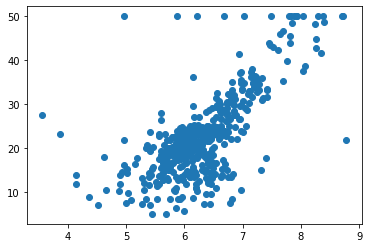

In [ ]:
# PREPARAR LA DATA REGRESIÓN POLINOMIAL
#Seleccionamos solamente la columna 6 del dataset
X_p = boston.data[:, np.newaxis, 5]
#Defino los datos correspondientes a las etiquetas
y_p = boston.target
#Graficamos los datos correspondientes
plt.scatter(X_p, y_p)
plt.show()

In [ ]:
# IMPLEMENTACIÓN DE REGRESIÓN POLINOMIAL
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.2)
from sklearn.preprocessing import PolynomialFeatures
#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 2)

In [ ]:
#Se transforma las características existentes en características de mayor grado
X_train_poli = poli_reg.fit_transform(X_train_p)
X_test_poli = poli_reg.fit_transform(X_test_p)
#Defino el algoritmo a utilizar
pr = linear_model.LinearRegression()

In [ ]:
#Entreno el modelo
pr.fit(X_train_poli, y_train_p)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Realizo una predicción
Y_pred_pr = pr.predict(X_test_poli)

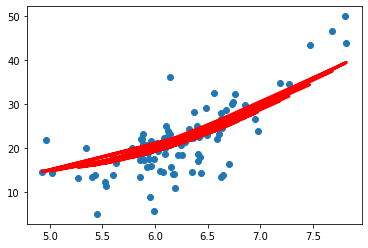

In [ ]:
#Graficamos los datos junto con el modelo
plt.scatter(X_test_p, y_test_p)
plt.plot(X_test_p, Y_pred_pr, color='red', linewidth=3)
plt.show()

In [ ]:
print('DATOS DEL MODELO REGRESIÓN POLINOMIAL')
print('Valor de la pendiente o coeficiente "a":')
print(pr.coef_)

DATOS DEL MODELO REGRESIÓN POLINOMIAL
Valor de la pendiente o coeficiente "a":
[  0.         -21.41295308   2.35400229]


In [ ]:
print('Valor de la intersección o coeficiente "b":')
print(pr.intercept_)

Valor de la intersección o coeficiente "b":
62.99085129694252


In [ ]:
print('Precisión del modelo:')
print(pr.score(X_train_poli, y_train_p))

Precisión del modelo:
0.5373926938621837


## **Segundo ejemplo**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
datos = pd.read_csv("boletos.csv")
df =pd.DataFrame(datos)
df.head()

,years,boleto
0,66,8.17
1,65,8.13
2,64,7.96
3,63,7.93
4,62,7.89


In [ ]:
x = df["years"]
y = df["boleto"]

In [ ]:
x1 = df["years"]
y1 = df["boleto"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25)
X_train = X_train.values.reshape([X_train.values.shape[0],1])
X_test =  X_test.values.reshape([X_test.values.shape[0],1])

In [ ]:
titles = ["Grado 0","Grado 1","Grado 2","Grado 3","Grado 4","Grado 5","Grado 6"]
colors = ["teal","pink","hotpink","orchid","aqua","green","blue"]

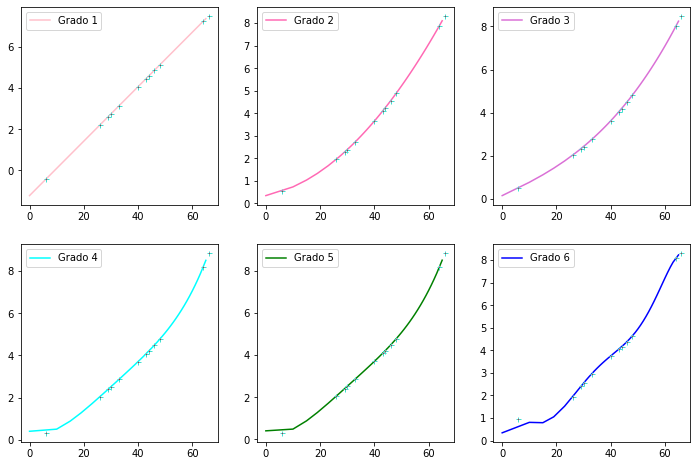

In [ ]:
plt.figure(figsize=(12,8))
for i in range (1,7):
  poly_features = PolynomialFeatures(degree=i)
  X_poly = poly_features.fit_transform(X_train)
  Xt_poly = poly_features.fit_transform(X_test)

  poly_model = LinearRegression()
  poly_model.fit(X_poly,y_train)

  pred  = poly_model.predict(X_poly) 
  pred2 = poly_model.predict(Xt_poly) 

  xt, yt = zip(*sorted(zip(X_test,pred2)))
  X,y = zip(*sorted(zip(X_train,pred)))

  plt.subplot(2,3,i)
  plt.plot(X,y,'-',color=colors[i],label=titles[i],markersize=2)
  plt.plot(xt,yt,'+',color='turquoise',markersize=5)
  plt.plot(xt,yt,'*',color='crimson',markersize=.5)
  plt.legend(loc=2)